In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.drop(["enrollee_id","city"],axis=1,inplace=True)
df["experience"].replace({np.NaN:0,">20":22,"<1":0},inplace=True)
df["last_new_job"].replace({np.NaN:0,">4":5,"never":0},inplace=True)
df["relevent_experience"].replace({"Has relevent experience":"YES","No relevent experience":"NO"},inplace=True)
df["experience"] = df["experience"].astype(int)
df["last_new_job"] = df["last_new_job"].astype(int)

In [6]:
def company_size(x):
    
    if x == "<10":
        return "LOCAL"
    elif x == "50-99" or x == "10/49":
        return "SMALL"
    elif x == "100-500":
        return "MEDIUM_SCALE"
    elif x == "500-999":
        return "UPPER_SCALE"
    elif x == "1000-4999" or x == "5000-9999":
        return "EXTENDED"
    elif x == "10000+":
        return "LARGE_SCALE"

In [7]:
def last_new_job(x):
    if x == 0:
        return "NEVER"
    elif 0 < x <= 2:
        return "LITTLE_TIME"
    elif x > 2:
        return "WAITING_TOO_MUCH"
    else:
        pass

In [8]:
def experience(x):
    
    
    if 0 <= x <= 3:
        return "JUNIOR"
    elif 3 < x <= 7:
        return "MIDDLE_EXPERIENCE"
    elif 7 < x <= 15:
        return "SENIOR"
    elif x > 15:
        return "DOMINATE_BUSINESS"

In [9]:
df["company_size"] = df["company_size"].apply(lambda x: company_size(x))
df["experience"] = df["experience"].apply(lambda x: experience(x))
df["last_new_job"] = df["last_new_job"].apply(lambda x: last_new_job(x))

In [10]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,YES,no_enrollment,Graduate,STEM,DOMINATE_BUSINESS,None,NaN,LITTLE_TIME,36,1.0
1,0.776,Male,NO,no_enrollment,Graduate,STEM,SENIOR,SMALL,Pvt Ltd,WAITING_TOO_MUCH,47,0.0
2,0.624,NaN,NO,Full time course,Graduate,STEM,MIDDLE_EXPERIENCE,None,NaN,NEVER,83,0.0
3,0.789,NaN,NO,NaN,Graduate,Business Degree,JUNIOR,None,Pvt Ltd,NEVER,52,1.0
4,0.767,Male,YES,no_enrollment,Masters,STEM,DOMINATE_BUSINESS,SMALL,Funded Startup,WAITING_TOO_MUCH,8,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19158 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            19158 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.8+ MB


In [12]:
df.company_type.replace(np.nan,'Early Stage Startup',inplace=True)
df.gender.replace(np.nan,'Female',inplace=True)
df.enrolled_university.replace(np.nan,'Part time course',inplace=True) 
df.education_level.replace(np.nan,'Phd',inplace=True)  
df.major_discipline.replace(np.nan,'Business Degree',inplace=True)
df.experience.replace(np.nan,'JUNIOR',inplace=True)
df.last_new_job.replace(np.nan,'never',inplace=True)
df.last_new_job.replace('never','NEVER',inplace=True)
df['target']=df['target'].astype('int64')
df['company_size'].replace(np.nan,'None',inplace=True)
df['company_size'].replace('None','SMALL',inplace=True)
df['target']=df['target'].astype('int64')

In [13]:
df.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [14]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,YES,no_enrollment,Graduate,STEM,DOMINATE_BUSINESS,SMALL,Early Stage Startup,LITTLE_TIME,36,1
1,0.776,Male,NO,no_enrollment,Graduate,STEM,SENIOR,SMALL,Pvt Ltd,WAITING_TOO_MUCH,47,0
2,0.624,Female,NO,Full time course,Graduate,STEM,MIDDLE_EXPERIENCE,SMALL,Early Stage Startup,NEVER,83,0
3,0.789,Female,NO,Part time course,Graduate,Business Degree,JUNIOR,SMALL,Pvt Ltd,NEVER,52,1
4,0.767,Male,YES,no_enrollment,Masters,STEM,DOMINATE_BUSINESS,SMALL,Funded Startup,WAITING_TOO_MUCH,8,0


In [15]:
df.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


Text(0.5, 1.0, 'city_development_index distribution')

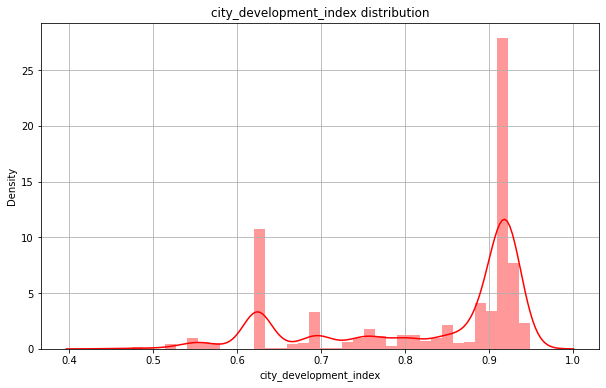

In [16]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.distplot(df['city_development_index'],color='red')
plt.title('city_development_index distribution')

Male      13221
Female     5746
Other       191
Name: gender, dtype: int64

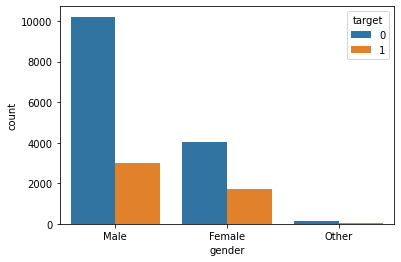

In [17]:
sns.countplot(data=df,x='gender',hue='target')
df.gender.value_counts()

# The Employees Having Experience or Not ?

YES    13792
NO      5366
Name: relevent_experience, dtype: int64

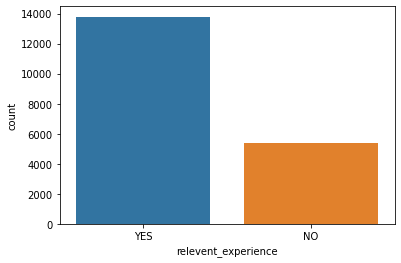

In [18]:
sns.countplot(df['relevent_experience'])
df['relevent_experience'].value_counts()

<AxesSubplot:xlabel='experience', ylabel='count'>

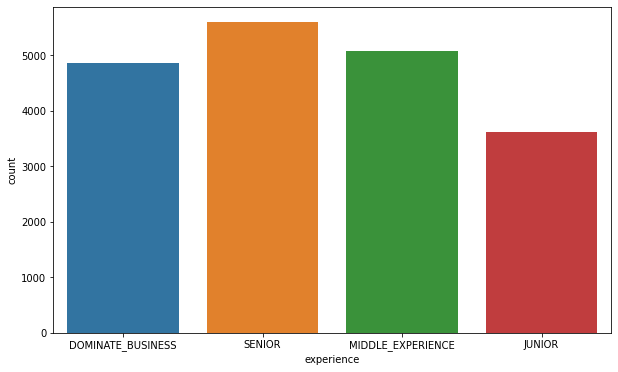

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df['experience'])

Pvt Ltd                9817
Early Stage Startup    6743
Funded Startup         1001
Public Sector           955
NGO                     521
Other                   121
Name: company_type, dtype: int64

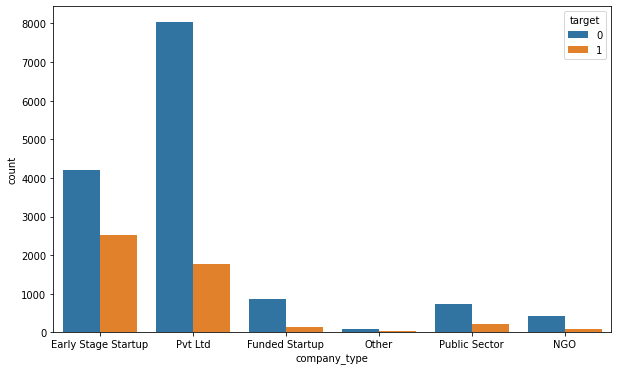

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='company_type',hue='target')
df['company_type'].value_counts()

# Education Level of Employees

Graduate          11598
Masters            4361
High School        2017
Phd                 874
Primary School      308
Name: education_level, dtype: int64

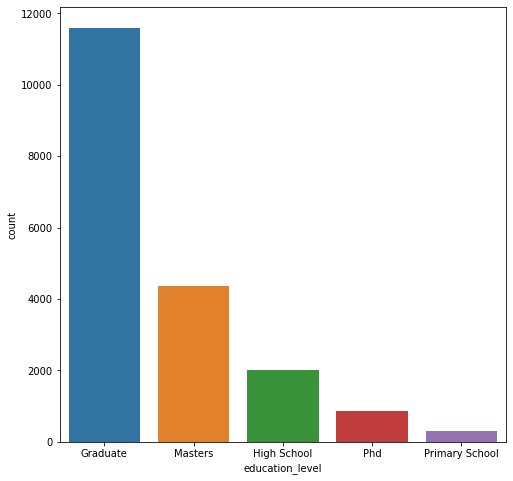

In [21]:
plt.figure(figsize=[8,8])
sns.countplot(df['education_level'])
df['education_level'].value_counts()

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

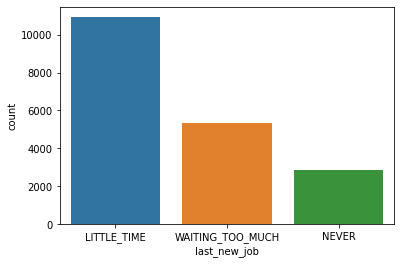

In [22]:
sns.countplot(df['last_new_job'])

# is the Employees enrolled  University courses ?

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

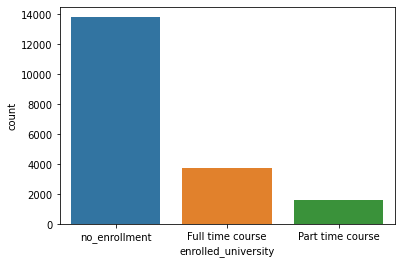

In [23]:
sns.countplot(df['enrolled_university'])

# from which educational background employees are more

STEM               14492
Business Degree     3140
Humanities           669
Other                381
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

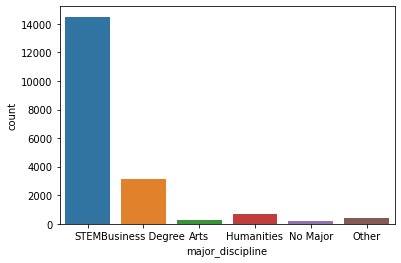

In [24]:
sns.countplot(df['major_discipline'])
df['major_discipline'].value_counts()

<AxesSubplot:xlabel='experience', ylabel='count'>

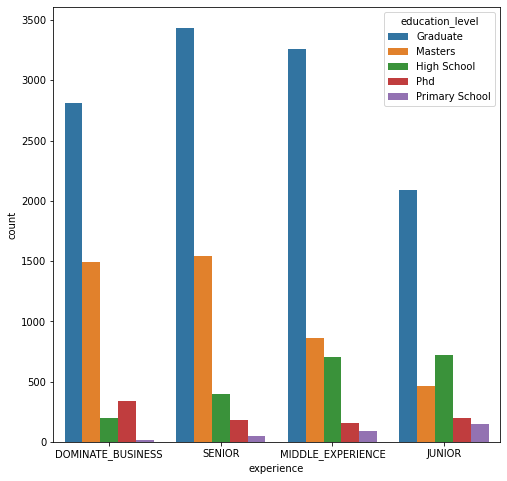

In [25]:
plt.figure(figsize=[8,8])
sns.countplot(data=df,x='experience',hue='education_level')

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

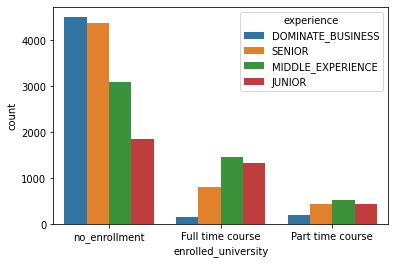

In [26]:
sns.countplot(data=df,x='enrolled_university',hue='experience')

<AxesSubplot:xlabel='company_size', ylabel='count'>

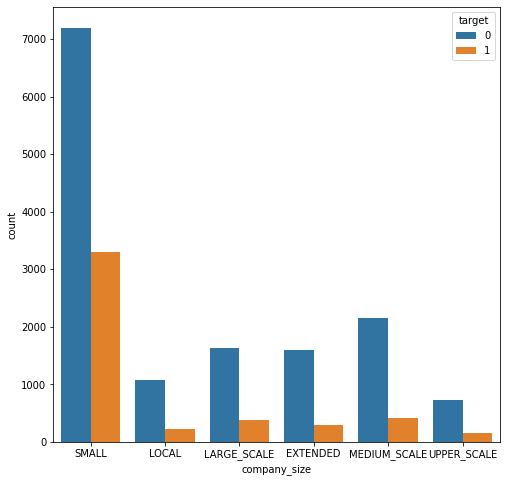

In [27]:
plt.figure(figsize=[8,8])
sns.countplot(data=df,x='company_size',hue='target')

<AxesSubplot:xlabel='experience', ylabel='count'>

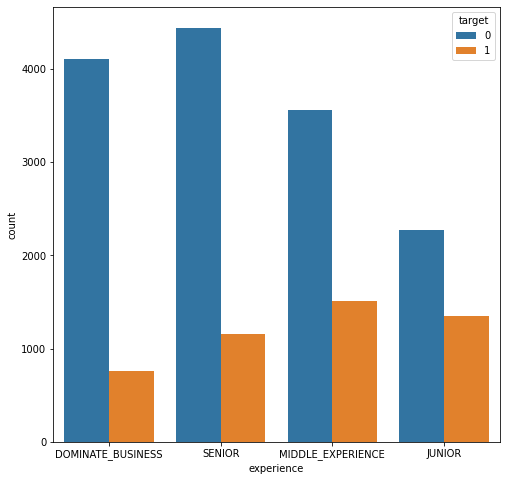

In [28]:
plt.figure(figsize=[8,8])
sns.countplot(data=df,x='experience',hue='target')

<Figure size 576x576 with 0 Axes>

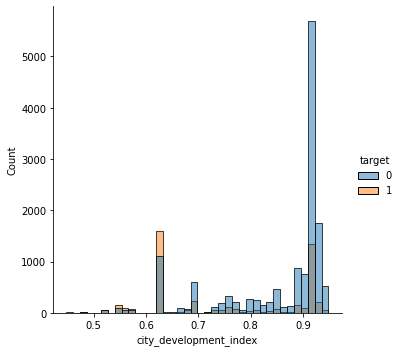

In [29]:
plt.figure(figsize=[8,8])
sns.displot(x ='city_development_index',hue='target',data =df)

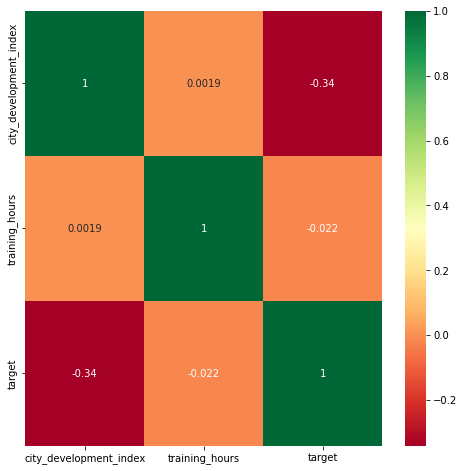

In [30]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

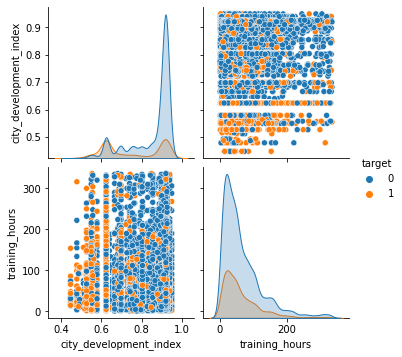

In [31]:
sns.pairplot(df,hue='target')

In [32]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,YES,no_enrollment,Graduate,STEM,DOMINATE_BUSINESS,SMALL,Early Stage Startup,LITTLE_TIME,36,1
1,0.776,Male,NO,no_enrollment,Graduate,STEM,SENIOR,SMALL,Pvt Ltd,WAITING_TOO_MUCH,47,0
2,0.624,Female,NO,Full time course,Graduate,STEM,MIDDLE_EXPERIENCE,SMALL,Early Stage Startup,NEVER,83,0
3,0.789,Female,NO,Part time course,Graduate,Business Degree,JUNIOR,SMALL,Pvt Ltd,NEVER,52,1
4,0.767,Male,YES,no_enrollment,Masters,STEM,DOMINATE_BUSINESS,SMALL,Funded Startup,WAITING_TOO_MUCH,8,0


In [33]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(['int64','float'])

In [34]:
df_cat.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,YES,no_enrollment,Graduate,STEM,DOMINATE_BUSINESS,SMALL,Early Stage Startup,LITTLE_TIME
1,Male,NO,no_enrollment,Graduate,STEM,SENIOR,SMALL,Pvt Ltd,WAITING_TOO_MUCH
2,Female,NO,Full time course,Graduate,STEM,MIDDLE_EXPERIENCE,SMALL,Early Stage Startup,NEVER
3,Female,NO,Part time course,Graduate,Business Degree,JUNIOR,SMALL,Pvt Ltd,NEVER
4,Male,YES,no_enrollment,Masters,STEM,DOMINATE_BUSINESS,SMALL,Funded Startup,WAITING_TOO_MUCH


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [37]:
df_cat

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,1,1,2,0,5,0,4,0,0
1,1,0,2,0,5,3,4,5,2
2,0,0,0,0,5,2,4,0,1
3,0,0,1,0,1,1,4,5,1
4,1,1,2,2,5,0,4,1,2
...,...,...,...,...,...,...,...,...,...
19153,1,0,2,0,2,3,4,0,0
19154,1,1,2,0,5,3,4,0,2
19155,1,1,2,0,5,0,4,5,2
19156,1,1,2,1,1,1,5,5,0


In [38]:
df_num

,city_development_index,training_hours,target
0,0.920,36,1
1,0.776,47,0
2,0.624,83,0
3,0.789,52,1
4,0.767,8,0
...,...,...,...
19153,0.878,42,1
19154,0.920,52,1
19155,0.920,44,0
19156,0.802,97,0


In [39]:
df1=pd.concat([df_cat,df_num],axis=1)

In [40]:
df1

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
0,1,1,2,0,5,0,4,0,0,0.920,36,1
1,1,0,2,0,5,3,4,5,2,0.776,47,0
2,0,0,0,0,5,2,4,0,1,0.624,83,0
3,0,0,1,0,1,1,4,5,1,0.789,52,1
4,1,1,2,2,5,0,4,1,2,0.767,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,1,0,2,0,2,3,4,0,0,0.878,42,1
19154,1,1,2,0,5,3,4,0,2,0.920,52,1
19155,1,1,2,0,5,0,4,5,2,0.920,44,0
19156,1,1,2,1,1,1,5,5,0,0.802,97,0


In [41]:
x = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

In [42]:
x

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours
0,1,1,2,0,5,0,4,0,0,0.920,36
1,1,0,2,0,5,3,4,5,2,0.776,47
2,0,0,0,0,5,2,4,0,1,0.624,83
3,0,0,1,0,1,1,4,5,1,0.789,52
4,1,1,2,2,5,0,4,1,2,0.767,8
...,...,...,...,...,...,...,...,...,...,...,...
19153,1,0,2,0,2,3,4,0,0,0.878,42
19154,1,1,2,0,5,3,4,0,2,0.920,52
19155,1,1,2,0,5,0,4,5,2,0.920,44
19156,1,1,2,1,1,1,5,5,0,0.802,97


In [43]:
y

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int64

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [45]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest, ypred)*100)
    print(classification_report(ytest, ypred))

In [46]:
logreg = LogisticRegression()

In [47]:
mymodel(logreg)

76.39178844815588
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      4329
           1       0.59      0.14      0.22      1419

    accuracy                           0.76      5748
   macro avg       0.68      0.55      0.54      5748
weighted avg       0.73      0.76      0.70      5748



In [48]:
rf = RandomForestClassifier(max_samples=100, random_state=5)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [49]:
print(accuracy_score(ytest, ypred)*100)
print(classification_report(ytest, ypred))

77.31384829505915
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4329
           1       0.59      0.26      0.36      1419

    accuracy                           0.77      5748
   macro avg       0.69      0.60      0.61      5748
weighted avg       0.75      0.77      0.74      5748



In [50]:
gdc=GradientBoostingClassifier(n_estimators=100)

In [51]:
mymodel(gdc)

78.67084203201114
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4329
           1       0.58      0.49      0.53      1419

    accuracy                           0.79      5748
   macro avg       0.71      0.69      0.70      5748
weighted avg       0.78      0.79      0.78      5748



In [52]:
x,y = SMOTE(random_state =1).fit_resample(x, y)

As we can see clearly, the data is very imbalanced which needs to be dealt with if we want our model to train properly. For this, I used SMOTE(Synthetic Minority Oversampling Technique) to make the data balanced.

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [54]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest, ypred)*100)
    print(classification_report(ytest, ypred))

In [55]:
mymodel(logreg)

72.44176613744351
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      4370
           1       0.72      0.73      0.72      4259

    accuracy                           0.72      8629
   macro avg       0.72      0.72      0.72      8629
weighted avg       0.72      0.72      0.72      8629



In [56]:
rf = RandomForestClassifier(max_samples=100, random_state=5)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
print(accuracy_score(ytest, ypred)*100)
print(classification_report(ytest, ypred))

75.51280565534825
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      4370
           1       0.72      0.81      0.77      4259

    accuracy                           0.76      8629
   macro avg       0.76      0.76      0.75      8629
weighted avg       0.76      0.76      0.75      8629



In [57]:
gdc=GradientBoostingClassifier(n_estimators=100)
mymodel(gdc)

78.54907868814462
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      4370
           1       0.76      0.83      0.79      4259

    accuracy                           0.79      8629
   macro avg       0.79      0.79      0.79      8629
weighted avg       0.79      0.79      0.79      8629



# Hyperparameter Tunning

In [58]:
logreg = LogisticRegression(solver="liblinear")
mymodel(logreg)

73.51952717580252
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      4370
           1       0.73      0.73      0.73      4259

    accuracy                           0.74      8629
   macro avg       0.74      0.74      0.74      8629
weighted avg       0.74      0.74      0.74      8629



In [59]:
cvs = cross_val_score(logreg, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()*100}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 73.78888995865796
STD -: 0.031043735969232666


In [60]:
cvs = cross_val_score(rf, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()*100}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 75.56910173304402
STD -: 0.03094779230821772


In [61]:
cvs = cross_val_score(gdc, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()*100}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 79.09815385056122
STD -: 0.0381932590207221


In [62]:
prediction = rf.predict(x)
print(prediction)

[0 0 1 ... 1 0 1]


In [63]:
import pickle
with open('model.pkl','wb') as file:
     pickle.dump(rf,file)

In [64]:
with open('model.pkl','rb') as file:
    data=pickle.load(file)

# Result

The maximum accuracy got as 78.67 % by using gradient boosting Classifier . but we dont got proper f1-score hence we use smote (Synthetic Minority Oversampling Technique). by using this we got better f1 score aand maximum accuracy got as 79.09 % by using gradient boosting Classifier .

# Conclusion

1. from small company size and having experience of junior and middle experience employees leaving the job , to find the new   job
2. male employees leaves their job more as compare to female employees.
3. most of the employees from early stage startup leave their job while employees work in public sector and , NGO have least   count of leave the job .